# FCNN 이용하여 MINST 분류하기
+ 본과정에서는 Fully Connected Neuron Network 이용해서 손글씨 MNIST를 분류하는 실습 수행
+ 입력으로 Keras Dataset MNIST 활용
+ 이미지 분류시 DNN을 사용해서 이미지를 분류 수행

### 학습목차
1. Import modules
2. 데이터 불러오기 : Keras Dataset MNIST 활용
3. FCNN 모델 구성
4. 모델 Compile : model.compile
5. 학습 수행 : model.fit , EarlyStopping , ModelCheckpoint
6. 학습 결과 테스트 : model.evaluate
7. 성능 그래프
8. 설젠 테스트 : 손글씨 입력해서 분류 잘하는지 보기

## 1. Import modules

In [ ]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 2. 데이터 불러오기

In [ ]:
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

11490434/11490434 [==============================] - 0s 0us/step


In [ ]:
# 3차원 배열
x_train.shape, x_test.shape

((60000, 28, 28), (10000, 28, 28))

## 3. FCNN 모델 구성

#### ㅇ FCNN 입력 구조 : 2차원 : Batch * row
#### ㅇ 이미지 입력 데이터를 일렬로 쭉 펴서 모델에 주어야 하므로 Flatten 함수를 사용함.


In [ ]:
model = tf.keras.models.Sequential([tf.keras.layers.Flatten(input_shape=(28, 28)),
                                    tf.keras.layers.Dense(128, activation='relu'),
                                    tf.keras.layers.Dropout(0.2),
                                    tf.keras.layers.Dense(10, activation='softmax')])

## 4. 모델 Compile

In [ ]:
model.compile(optimizer='adam',
             loss='sparse_categorical_crossentropy',
             metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 128)               100480    
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101770 (397.54 KB)
Trainable params: 101770 (397.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 5. 학습 수행

In [ ]:
EPOCHS = 50
BATCH_SIZE = 1024

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
es = EarlyStopping(monitor='val_loss', patience=4, mode='min', verbose=1)
mc = ModelCheckpoint('best_model.h5', monitor='val_accuracy', mode='max', save_best_only=True, verbose=1)

In [ ]:
history = model.fit(x_train, y_train, epochs=EPOCHS, batch_size=BATCH_SIZE, callbacks=[es, mc], validation_data=(x_test, y_test))

Epoch 1/50
48/59 [=======================>......] - ETA: 0s - loss: 0.9540 - accuracy: 0.7320
Epoch 1: val_accuracy improved from -inf to 0.90710, saving model to best_model.h5
59/59 [==============================] - 7s 10ms/step - loss: 0.8627 - accuracy: 0.7574 - val_loss: 0.3544 - val_accuracy: 0.9071
Epoch 2/50
40/59 [===================>..........] - ETA: 0s - loss: 0.3703 - accuracy: 0.8938

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


51/59 [========================>.....] - ETA: 0s - loss: 0.3589 - accuracy: 0.8976
Epoch 2: val_accuracy improved from 0.90710 to 0.92320, saving model to best_model.h5
59/59 [==============================] - 0s 6ms/step - loss: 0.3542 - accuracy: 0.8992 - val_loss: 0.2679 - val_accuracy: 0.9232
Epoch 3/50
49/59 [=======================>......] - ETA: 0s - loss: 0.2851 - accuracy: 0.9195
Epoch 3: val_accuracy improved from 0.92320 to 0.93510, saving model to best_model.h5
59/59 [==============================] - 0s 5ms/step - loss: 0.2822 - accuracy: 0.9206 - val_loss: 0.2277 - val_accuracy: 0.9351
Epoch 4/50
50/59 [========================>.....] - ETA: 0s - loss: 0.2465 - accuracy: 0.9290
Epoch 4: val_accuracy improved from 0.93510 to 0.94380, saving model to best_model.h5
59/59 [==============================] - 0s 5ms/step - loss: 0.2433 - accuracy: 0.9297 - val_loss: 0.1976 - val_accuracy: 0.9438
Epoch 5/50
48/59 [=======================>......] - ETA: 0s - loss: 0.2137 - accurac

## 6. 학습 결과 테스트

In [ ]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0723 - accuracy: 0.9772


[0.0723014622926712, 0.9771999716758728]

## 7. 성능 그래프

In [ ]:
x_range = range(1,len(history.history['accuracy'])+1)

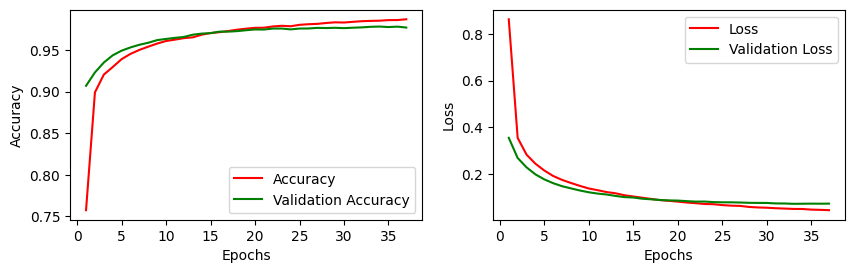

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(221)
plt.plot(x_range, history.history['accuracy'], color='red', label='Accuracy')
plt.plot(x_range, history.history['val_accuracy'], color='green', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(222)
plt.plot(x_range, history.history['loss'], color='red', label='Loss')
plt.plot(x_range, history.history['val_loss'], color='green', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

## 8. 실전 테스트 : 손글씨 입력해서 분류 잘하는지 보기

In [ ]:
x_test[0].shape

(28, 28)

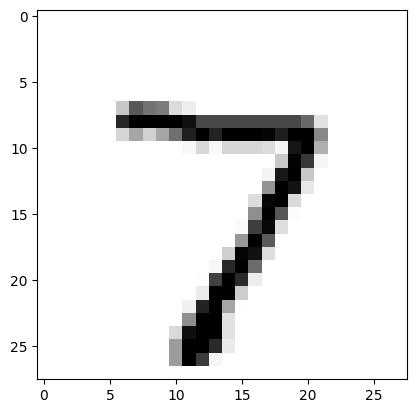

1/1 [==============================] - 0s 16ms/step
Prediction Probability:  [[1.9220288e-06 4.9293285e-09 2.7381782e-06 1.6332720e-04 3.4800788e-08
  8.9293394e-08 1.6557587e-11 9.9980181e-01 3.9153579e-07 2.9685772e-05]]
The Answer is  [7]


In [ ]:
n = 0
plt.imshow(x_test[n], cmap='Greys')
plt.show()

pred = model.predict(x_test[n].reshape(1,28,28))
answer = np.argmax(pred, axis=-1)

print('Prediction Probability: ', pred)
print('The Answer is ', answer)

## 배운 내용 정리
1. Keras 손글씨 MNIST Dataset 활용
2. FCNN 모델 구성 : 주의할점은 이미지를 1차원으로 받아야 하기에 Flatten() 함수 사용해서 입력 받아야 함.
3. FCNN 모델도 이미지 분류를 할수 있다는것을 알수 있었다.